Name:Chandana C

USN:1AJ22CS030

Email:chandana220105@gmail.com



Branch:Computer science and engineeing

College:CITNC


 ** Project Title: Brand awareness score prediction based on campaign reach and frequency**

The main aim of this project is to predict the level of brand awareness generated by a marketing campaign using machine learning techniques based on campaign performance and strategic features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [2]:

from google.colab import files
uploaded = files.upload()

Saving brand_awareness.csv to brand_awareness.csv


In [3]:
# Upload CSV in Colab first
df = pd.read_csv('/content/brand_awareness.csv')




In [4]:
df.shape

(1000, 13)

In [5]:
df.head()



,campaign_reach_impressions,frequency,media_channels_count,campaign_duration_days,creative_quality,message_clarity,targeting_accuracy,competitive_clutter,season,budget_allocation,market_segment,geographic_coverage,awareness_score
0,5.351906e+05,7.248496,5.0,129.0,Average,Low,NaN,Medium,Regular,Concentrated,Professionals,Regional,94.592610
1,9.304753e+06,4.723590,5.0,33.0,Average,Medium,Precise,Medium,Special Event,Distributed,Seniors,Global,40.189028
2,9.079436e+06,3.094742,2.0,54.0,Excellent,Medium,Precise,Low,Holiday,Distributed,Professionals,Local,31.172317
3,6.384880e+06,NaN,2.0,12.0,Poor,High,Broad,Medium,Holiday,Concentrated,Professionals,National,50.134772
4,1.045200e+06,13.868409,1.0,138.0,Average,Medium,Precise,High,Regular,Concentrated,Family,Global,47.809640


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   campaign_reach_impressions  956 non-null    float64
 1   frequency                   948 non-null    float64
 2   media_channels_count        954 non-null    float64
 3   campaign_duration_days      953 non-null    float64
 4   creative_quality            942 non-null    object 
 5   message_clarity             954 non-null    object 
 6   targeting_accuracy          944 non-null    object 
 7   competitive_clutter         946 non-null    object 
 8   season                      947 non-null    object 
 9   budget_allocation           940 non-null    object 
 10  market_segment              957 non-null    object 
 11  geographic_coverage         954 non-null    object 
 12  awareness_score             956 non-null    float64
dtypes: float64(5), object(8)
memory us

In [7]:
df.describe()

,campaign_reach_impressions,frequency,media_channels_count,campaign_duration_days,awareness_score
count,9.560000e+02,948.000000,954.000000,953.000000,956.000000
mean,4.906736e+06,7.753217,3.071279,92.228751,59.866917
std,2.924949e+06,4.024502,1.414641,49.725994,22.836171
min,1.383713e+04,1.047700,1.000000,7.000000,20.072976
25%,2.249558e+06,4.338503,2.000000,49.000000,40.674179
50%,5.026315e+06,7.618790,3.000000,92.000000,59.809523
75%,7.353963e+06,11.212895,4.000000,134.000000,78.745801
max,9.998365e+06,14.990515,5.000000,179.000000,99.957587


2.Do missing value analysis anda data imputation


In [8]:
df.isnull()


,campaign_reach_impressions,frequency,media_channels_count,campaign_duration_days,creative_quality,message_clarity,targeting_accuracy,competitive_clutter,season,budget_allocation,market_segment,geographic_coverage,awareness_score
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

,0
campaign_reach_impressions,44
frequency,52
media_channels_count,46
campaign_duration_days,47
creative_quality,58
message_clarity,46
targeting_accuracy,56
competitive_clutter,54
season,53
budget_allocation,60


In [10]:
df_cleaned=df.copy()

In [11]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

In [12]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

In [13]:
df_cleaned.isnull().sum()

,0
campaign_reach_impressions,0
frequency,0
media_channels_count,0
campaign_duration_days,0
creative_quality,0
message_clarity,0
targeting_accuracy,0
competitive_clutter,0
season,0
budget_allocation,0


In [14]:
df_cleaned.to_csv("brand_awareness.csv", index=False)
print("\nCleaned dataset saved as brand_awareness.csv")


Cleaned dataset saved as brand_awareness.csv


In [15]:
dh_cleaned=pd.read_csv("brand_awareness.csv")

In [16]:
df_cleaned.head(10)

,campaign_reach_impressions,frequency,media_channels_count,campaign_duration_days,creative_quality,message_clarity,targeting_accuracy,competitive_clutter,season,budget_allocation,market_segment,geographic_coverage,awareness_score
0,5.351906e+05,7.248496,5.0,129.0,Average,Low,Broad,Medium,Regular,Concentrated,Professionals,Regional,94.592610
1,9.304753e+06,4.723590,5.0,33.0,Average,Medium,Precise,Medium,Special Event,Distributed,Seniors,Global,40.189028
2,9.079436e+06,3.094742,2.0,54.0,Excellent,Medium,Precise,Low,Holiday,Distributed,Professionals,Local,31.172317
3,6.384880e+06,7.753217,2.0,12.0,Poor,High,Broad,Medium,Holiday,Concentrated,Professionals,National,50.134772
4,1.045200e+06,13.868409,1.0,138.0,Average,Medium,Precise,High,Regular,Concentrated,Family,Global,47.809640
5,4.837065e+06,14.234477,4.0,20.0,Good,High,Broad,Medium,Holiday,Distributed,Professionals,National,62.812514
6,1.521814e+05,10.161903,5.0,24.0,Poor,Medium,Moderate,Low,Holiday,Distributed,Professionals,Local,96.326688
7,7.011088e+06,11.245744,5.0,103.0,Good,High,Broad,Low,Regular,Concentrated,Youth,Local,54.332441
8,1.502718e+06,11.857444,4.0,39.0,Average,Medium,Moderate,Low,Special Event,Concentrated,Family,Regional,98.358055
9,8.208359e+06,12.442221,4.0,178.0,Excellent,Low,Broad,Low,Special Event,Distributed,Family,Local,33.852809


3.EDA and Data Visiualization

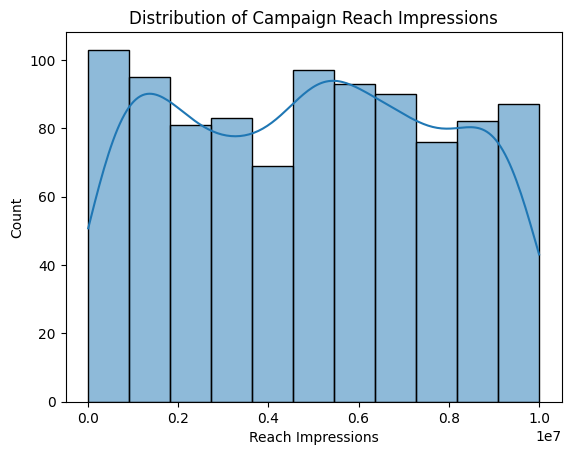

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['campaign_reach_impressions'], kde=True)
plt.title("Distribution of Campaign Reach Impressions")
plt.xlabel("Reach Impressions")
plt.ylabel("Count")
plt.show()


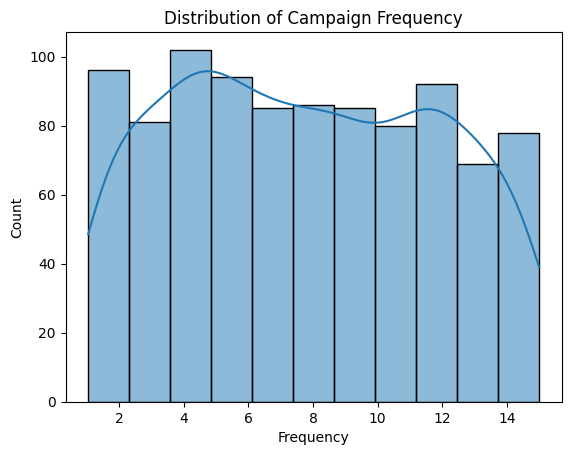

In [18]:
sns.histplot(df['frequency'], kde=True)
plt.title("Distribution of Campaign Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()


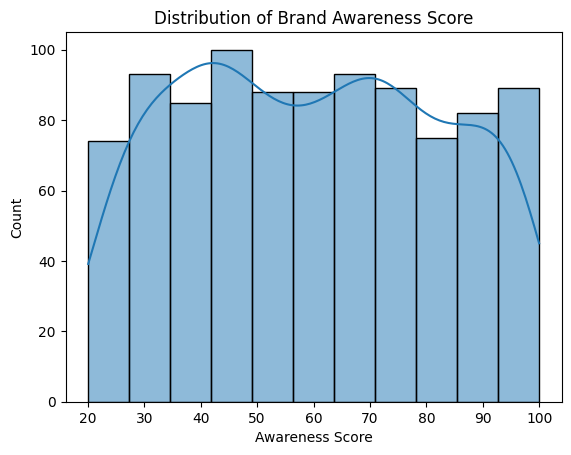

In [19]:
sns.histplot(df['awareness_score'], kde=True)
plt.title("Distribution of Brand Awareness Score")
plt.xlabel("Awareness Score")
plt.ylabel("Count")
plt.show()


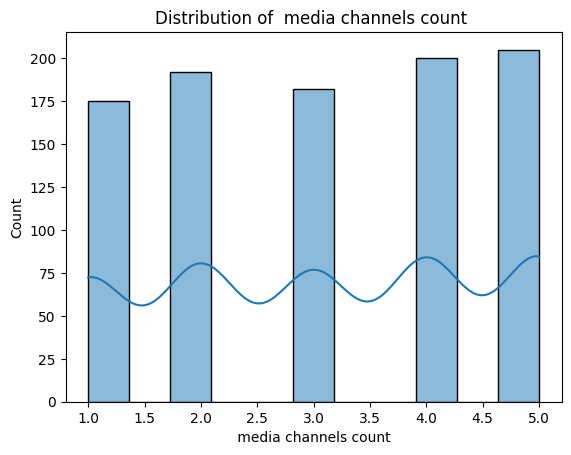

In [20]:
sns.histplot(df['media_channels_count'], kde=True)
plt.title("Distribution of  media channels count ")
plt.xlabel(" media channels count ")
plt.ylabel("Count")
plt.show()

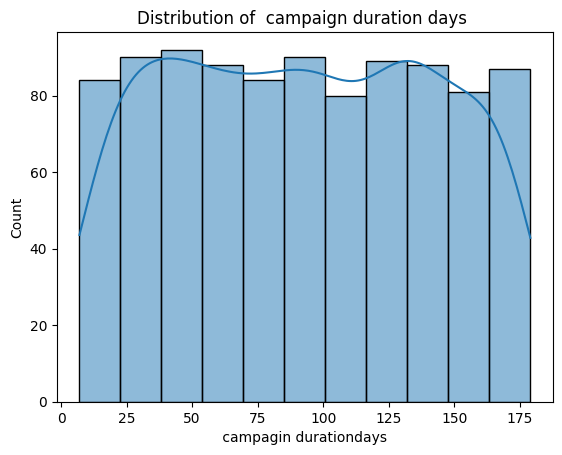

In [21]:
sns.histplot(df['campaign_duration_days'], kde=True)
plt.title("Distribution of  campaign duration days ")
plt.xlabel(" campagin durationdays ")
plt.ylabel("Count")
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("brand_awareness.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [23]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)


Index(['creative_quality', 'message_clarity', 'targeting_accuracy',
       'competitive_clutter', 'season', 'budget_allocation', 'market_segment',
       'geographic_coverage'],
      dtype='object')


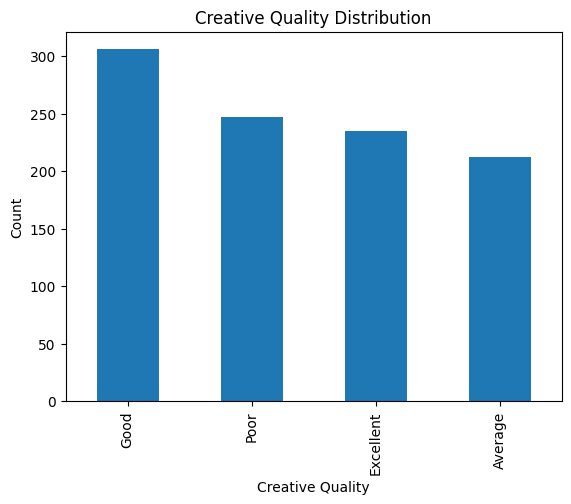

In [24]:
df['creative_quality'].value_counts().plot(kind='bar')
plt.title("Creative Quality Distribution")
plt.xlabel("Creative Quality")
plt.ylabel("Count")
plt.show()


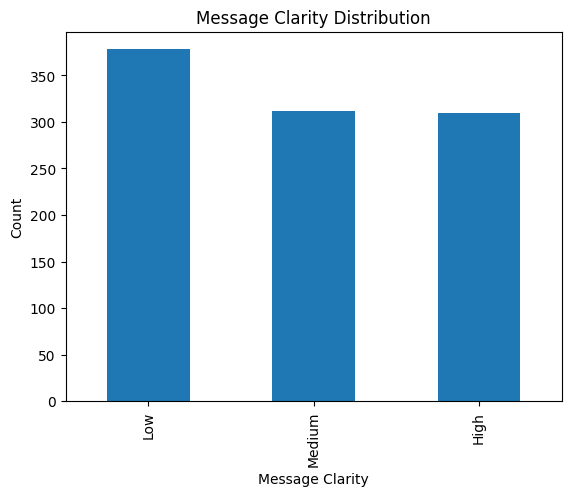

In [25]:
df['message_clarity'].value_counts().plot(kind='bar')
plt.title("Message Clarity Distribution")
plt.xlabel("Message Clarity")
plt.ylabel("Count")
plt.show()


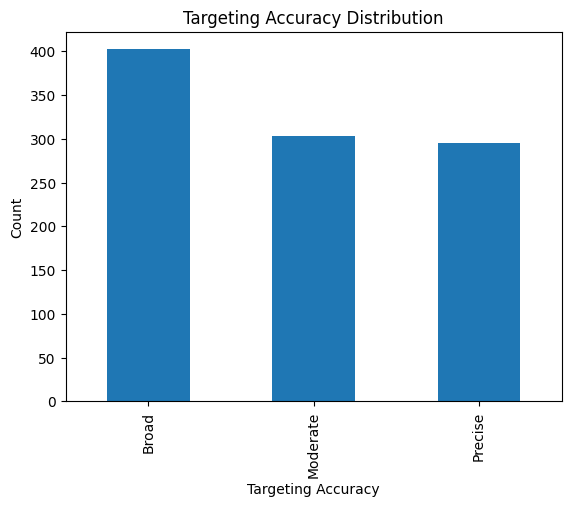

In [26]:
df['targeting_accuracy'].value_counts().plot(kind='bar')
plt.title("Targeting Accuracy Distribution")
plt.xlabel("Targeting Accuracy")
plt.ylabel("Count")
plt.show()


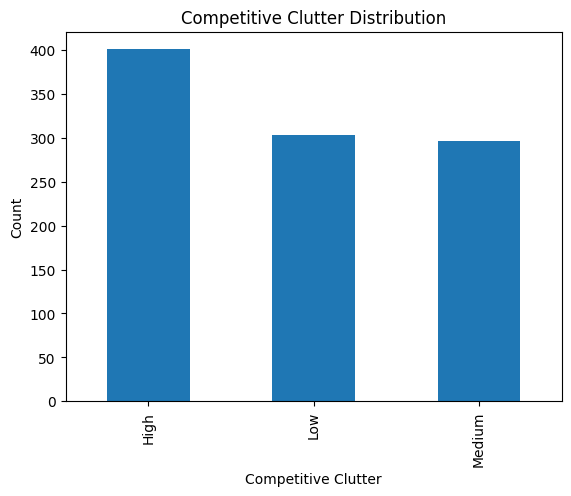

In [27]:

df['competitive_clutter'].value_counts().plot(kind='bar')
plt.title("Competitive Clutter Distribution")
plt.xlabel("Competitive Clutter")
plt.ylabel("Count")
plt.show()


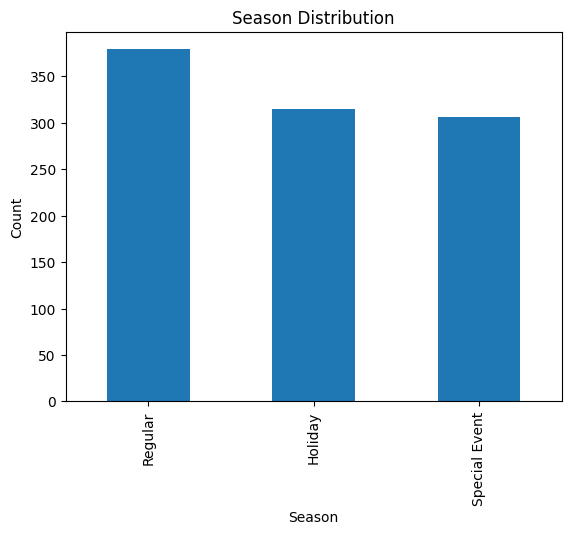

In [28]:
df['season'].value_counts().plot(kind='bar')
plt.title("Season Distribution")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


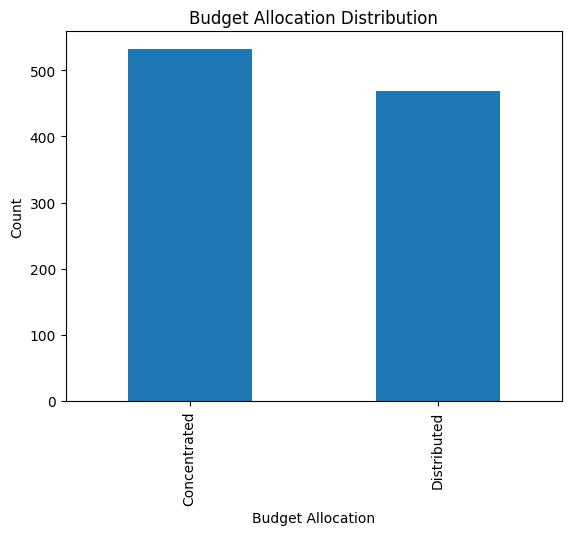

In [29]:
df['budget_allocation'].value_counts().plot(kind='bar')
plt.title("Budget Allocation Distribution")
plt.xlabel("Budget Allocation")
plt.ylabel("Count")
plt.show()


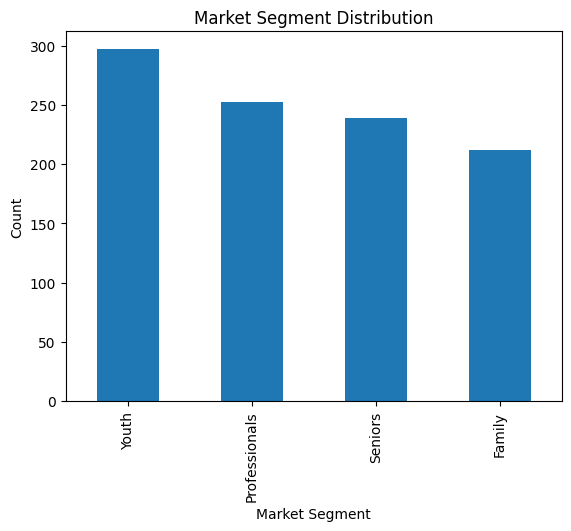

In [30]:
df['market_segment'].value_counts().plot(kind='bar')
plt.title("Market Segment Distribution")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.show()


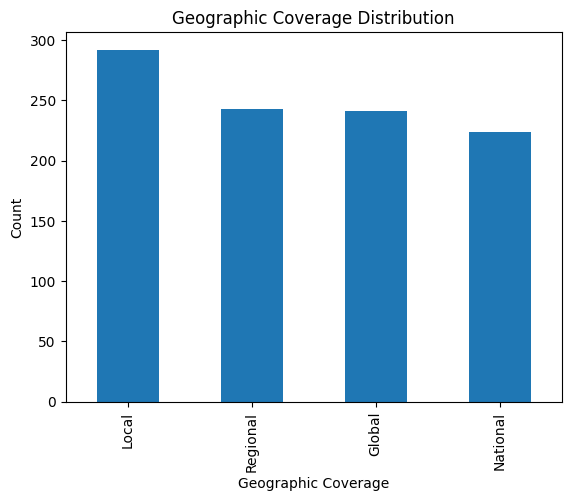

In [31]:
df['geographic_coverage'].value_counts().plot(kind='bar')
plt.title("Geographic Coverage Distribution")
plt.xlabel("Geographic Coverage")
plt.ylabel("Count")
plt.show()


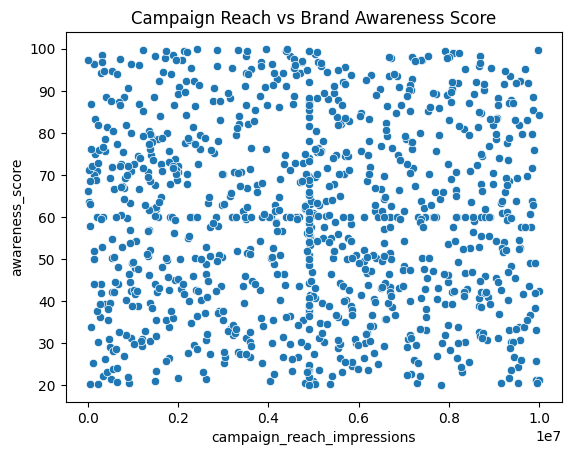

In [32]:
sns.scatterplot(
    x='campaign_reach_impressions',
    y='awareness_score',
    data=df
)
plt.title("Campaign Reach vs Brand Awareness Score")
plt.show()


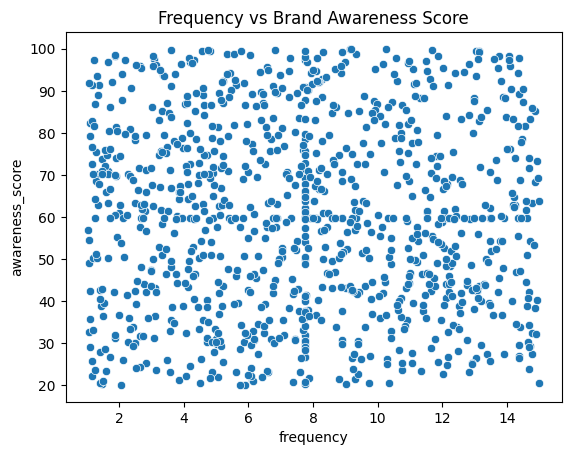

In [33]:
sns.scatterplot(
    x='frequency',
    y='awareness_score',
    data=df
)
plt.title("Frequency vs Brand Awareness Score")
plt.show()


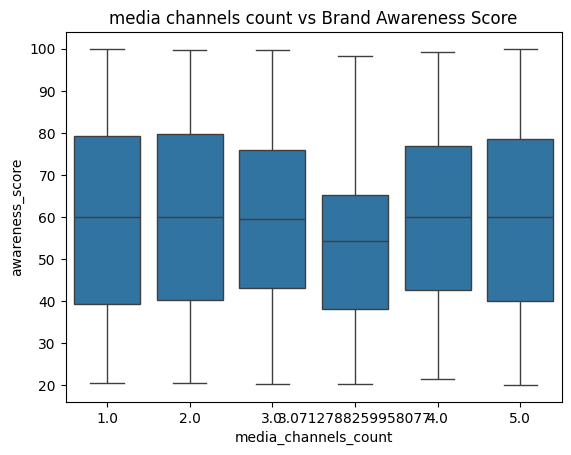

In [34]:
sns.boxplot(
    x='media_channels_count',
    y='awareness_score',
    data=df
)
plt.title("media channels count vs Brand Awareness Score")
plt.show()



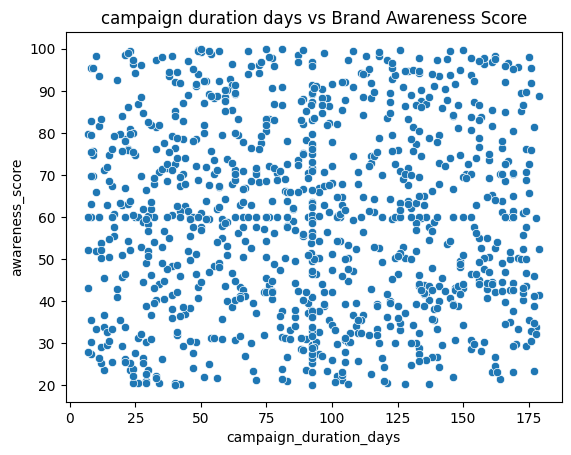

In [35]:
sns.scatterplot(
    x='campaign_duration_days',
    y='awareness_score',
    data=df
)
plt.title("campaign duration days vs Brand Awareness Score")
plt.show()



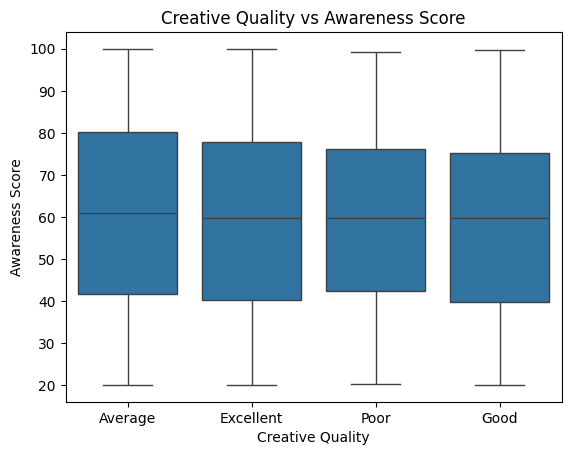

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names (important)
df.columns = df.columns.str.strip()

sns.boxplot(
    x='creative_quality',
    y='awareness_score',
    data=df
)

plt.title('Creative Quality vs Awareness Score')
plt.xlabel('Creative Quality')
plt.ylabel('Awareness Score')
plt.show()


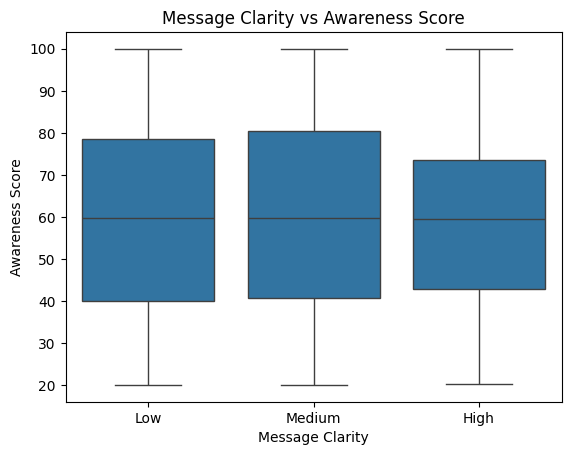

In [37]:
df.columns = df.columns.str.strip()

sns.boxplot(
    x='message_clarity',
    y='awareness_score',
    data=df
)

plt.title('Message Clarity vs Awareness Score')
plt.xlabel('Message Clarity')
plt.ylabel('Awareness Score')
plt.show()


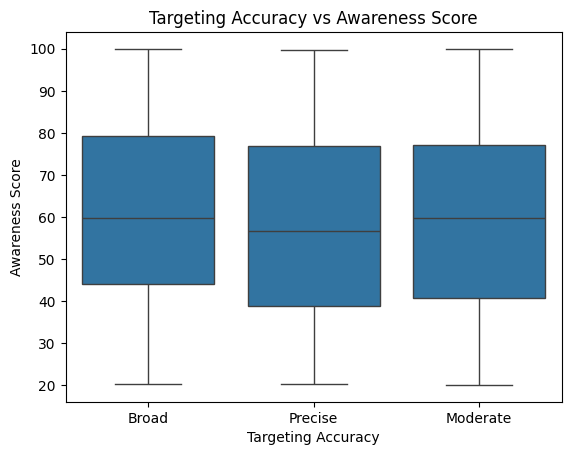

In [38]:
df.columns = df.columns.str.strip()

sns.boxplot(
    x='targeting_accuracy',
    y='awareness_score',
    data=df
)

plt.title('Targeting Accuracy vs Awareness Score')
plt.xlabel('Targeting Accuracy')
plt.ylabel('Awareness Score')
plt.show()


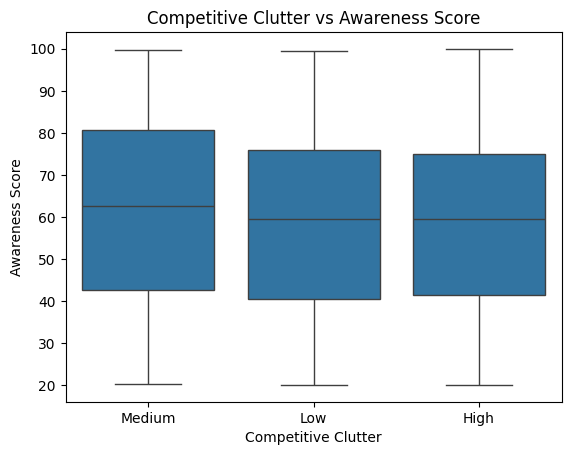

In [39]:
df.columns = df.columns.str.strip()

sns.boxplot(
    x='competitive_clutter',
    y='awareness_score',
    data=df
)

plt.title('Competitive Clutter vs Awareness Score')
plt.xlabel('Competitive Clutter')
plt.ylabel('Awareness Score')
plt.show()


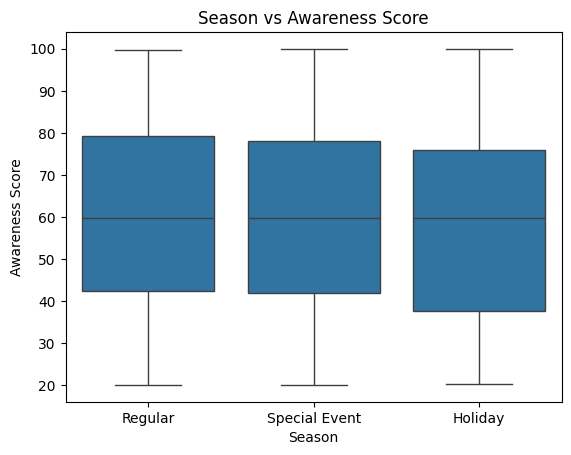

In [40]:
df.columns = df.columns.str.strip()

sns.boxplot(
    x='season',
    y='awareness_score',
    data=df
)

plt.title('Season vs Awareness Score')
plt.xlabel('Season')
plt.ylabel('Awareness Score')
plt.show()


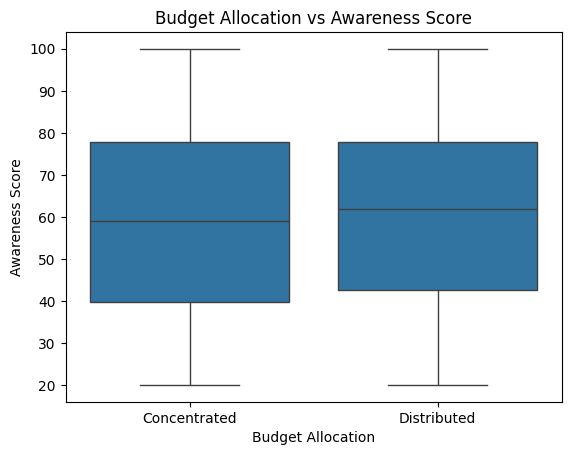

In [41]:
df.columns = df.columns.str.strip()

sns.boxplot(
    x='budget_allocation',
    y='awareness_score',
    data=df
)

plt.title('Budget Allocation vs Awareness Score')
plt.xlabel('Budget Allocation')
plt.ylabel('Awareness Score')
plt.show()


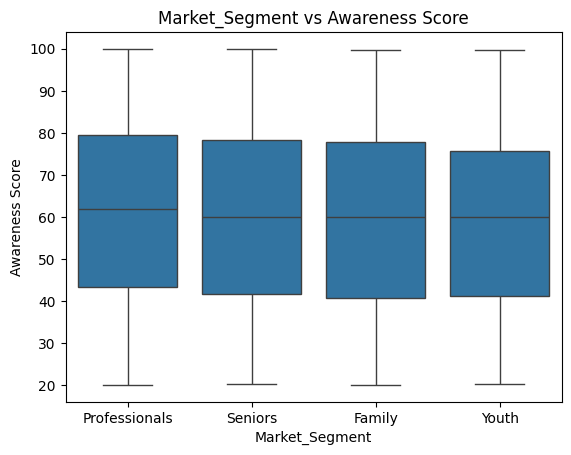

In [42]:
df.columns = df.columns.str.strip()

sns.boxplot(
    x='market_segment',
    y='awareness_score',
    data=df
)

plt.title('Market_Segment vs Awareness Score')
plt.xlabel('Market_Segment')
plt.ylabel('Awareness Score')
plt.show()


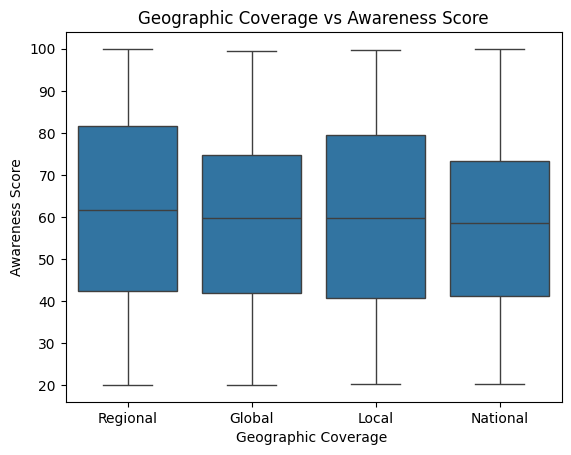

In [43]:
df.columns = df.columns.str.strip()

sns.boxplot(
    x='geographic_coverage',
    y='awareness_score',
    data=df
)

plt.title('Geographic Coverage vs Awareness Score')
plt.xlabel('Geographic Coverage ')
plt.ylabel('Awareness Score')
plt.show()


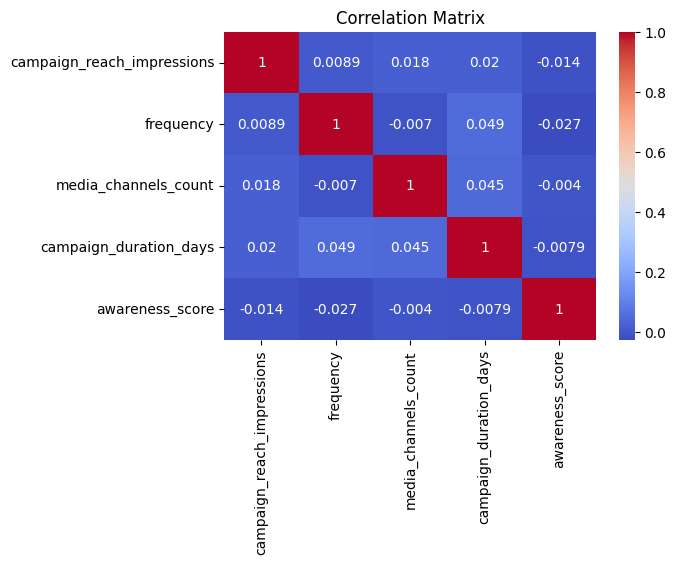

In [44]:

plt.figure(figsize=(6,4))
sns.heatmap(
    df[['campaign_reach_impressions', 'frequency', 'media_channels_count','campaign_duration_days','awareness_score']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()


4.Different types of Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Load dataset
df = pd.read_csv("brand_awareness.csv")

# Handle missing values
df['campaign_reach_impressions'] = df['campaign_reach_impressions'].fillna(
    df['campaign_reach_impressions'].median()
)
df['awareness_score'] = df['awareness_score'].fillna(
    df['awareness_score'].median()
)

# Simple Linear Regression (ONLY reach)
X_simple = df[['campaign_reach_impressions']]
y = df['awareness_score']

# Train-test split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

# Model training
simple_lr = LinearRegression()
simple_lr.fit(Xs_train, ys_train)

# Prediction
y_pred = simple_lr.predict(Xs_test)

# Evaluation
print("Simple Linear Regression R2 Score:", r2_score(ys_test, y_pred))


Simple Linear Regression R2 Score: -0.00566717978135034


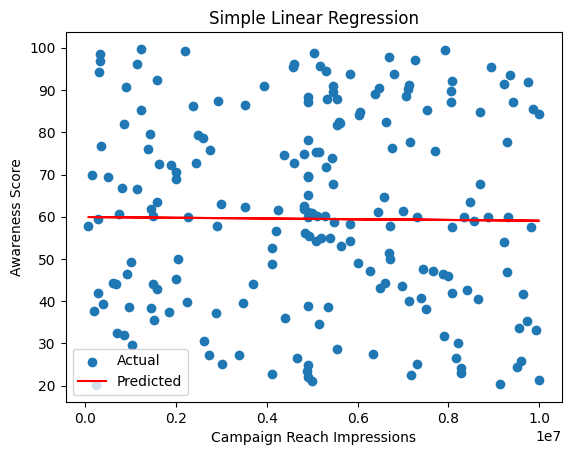

In [46]:
import matplotlib.pyplot as plt

plt.scatter(Xs_test, ys_test, label="Actual")
plt.plot(Xs_test, y_pred, color='red', label="Predicted")
plt.xlabel("Campaign Reach Impressions")
plt.ylabel("Awareness Score")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [47]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv("brand_awareness.csv")


# =========================
# 3. Handle Missing Values
# =========================
df['campaign_reach_impressions'] = df['campaign_reach_impressions'].fillna(
    df['campaign_reach_impressions'].median()
)

df['frequency'] = df['frequency'].fillna(
    df['frequency'].median()
)

df['awareness_score'] = df['awareness_score'].fillna(
    df['awareness_score'].median()
)


# =========================
# 4. SIMPLE LINEAR REGRESSION
# (Reach → Awareness)
# =========================
X_simple = df[['campaign_reach_impressions']]
y = df['awareness_score']

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

simple_lr = LinearRegression()
simple_lr.fit(Xs_train, ys_train)

y_pred_simple = simple_lr.predict(Xs_test)

print("Simple Linear Regression R2:",
      r2_score(ys_test, y_pred_simple))


# =========================
# 5. MULTIPLE LINEAR REGRESSION
# (Reach + Frequency → Awareness)
# =========================
X_multi = df[['campaign_reach_impressions', 'frequency']]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

multi_lr = LinearRegression()
multi_lr.fit(Xm_train, ym_train)

y_pred_multi = multi_lr.predict(Xm_test)

print("Multiple Linear Regression R2:",
      r2_score(ym_test, y_pred_multi))


# =========================
# 6. POLYNOMIAL REGRESSION
# (Degree = 2)
# =========================
X = df[['campaign_reach_impressions', 'frequency']]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

poly_lr = LinearRegression()
poly_lr.fit(Xp_train, yp_train)

y_pred_poly = poly_lr.predict(Xp_test)

print("Polynomial Regression R2:",
      r2_score(yp_test, y_pred_poly))


Simple Linear Regression R2: -0.00566717978135034
Multiple Linear Regression R2: -0.011535729199025235
Polynomial Regression R2: -0.01256926660202895


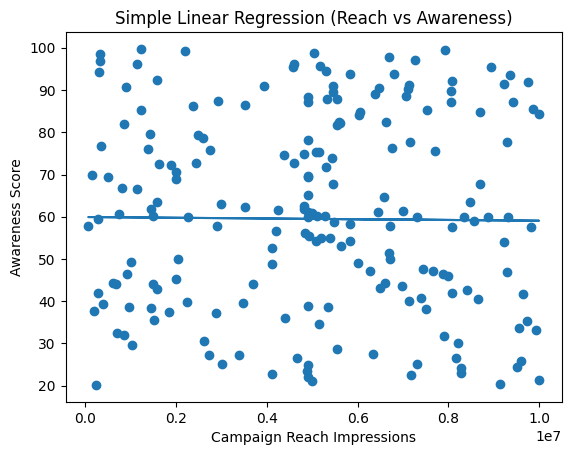

In [48]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, y_pred_simple)
plt.xlabel("Campaign Reach Impressions")
plt.ylabel("Awareness Score")
plt.title("Simple Linear Regression (Reach vs Awareness)")
plt.show()


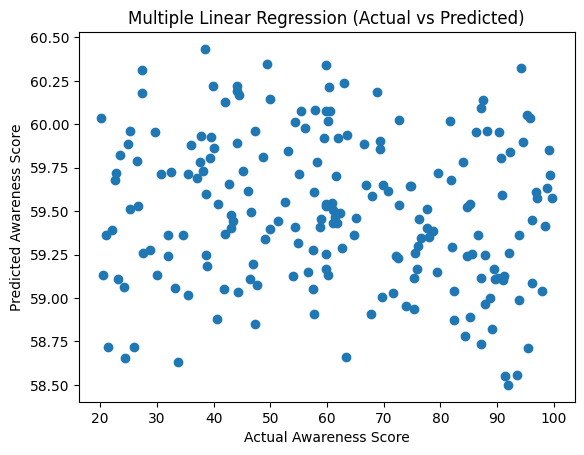

In [49]:
plt.figure()
plt.scatter(ym_test, y_pred_multi)
plt.xlabel("Actual Awareness Score")
plt.ylabel("Predicted Awareness Score")
plt.title("Multiple Linear Regression (Actual vs Predicted)")
plt.show()


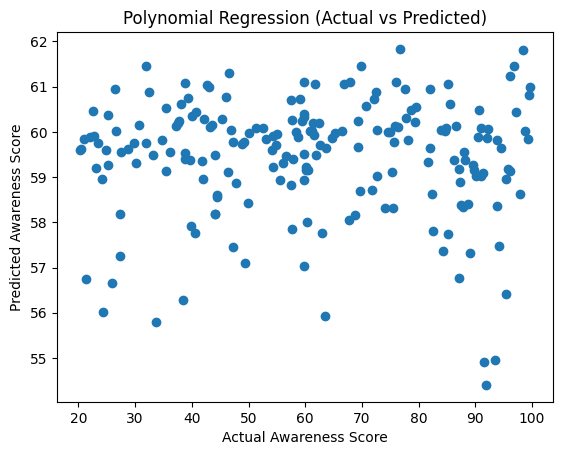

In [50]:
plt.figure()
plt.scatter(yp_test, y_pred_poly)
plt.xlabel("Actual Awareness Score")
plt.ylabel("Predicted Awareness Score")
plt.title("Polynomial Regression (Actual vs Predicted)")
plt.show()


5.Different types of conventional Classification

In [51]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv("brand_awareness.csv")



# =========================
# 3. Handle Missing Values
# =========================
df['campaign_reach_impressions'] = df['campaign_reach_impressions'].fillna(
    df['campaign_reach_impressions'].median()
)
df['frequency'] = df['frequency'].fillna(df['frequency'].median())
df['awareness_score'] = df['awareness_score'].fillna(
    df['awareness_score'].median()
)


# =========================
# 4. Convert Target to Classes
# (Low / Medium / High Awareness)
# =========================
df['awareness_class'] = pd.qcut(
    df['awareness_score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# Encode class labels
le = LabelEncoder()
df['awareness_class_encoded'] = le.fit_transform(df['awareness_class'])


# =========================
# 5. Feature Selection
# =========================
X = df[['campaign_reach_impressions', 'frequency']]
y = df['awareness_class_encoded']


# =========================
# 6. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# =========================
# 7. Feature Scaling
# =========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =========================
# 8. Logistic Regression (Multi-class)
# =========================
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


# =========================
# 9. Decision Tree Classifier
# =========================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))


# =========================
# 10. K-Nearest Neighbors
# =========================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:",
      accuracy_score(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.27
              precision    recall  f1-score   support

           0       0.23      0.12      0.16        74
           1       0.32      0.38      0.35        64
           2       0.24      0.34      0.28        62

    accuracy                           0.27       200
   macro avg       0.26      0.28      0.26       200
weighted avg       0.26      0.27      0.26       200

Decision Tree Accuracy: 0.27
KNN Accuracy: 0.31


In [52]:
# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv("brand_awareness.csv")


# =========================
# 3. Handle Missing Values
# =========================
df['campaign_reach_impressions'] = df['campaign_reach_impressions'].fillna(
    df['campaign_reach_impressions'].median()
)

df['frequency'] = df['frequency'].fillna(
    df['frequency'].median()
)

df['awareness_score'] = df['awareness_score'].fillna(
    df['awareness_score'].median()
)


# =========================
# 4. Convert Target to Classes
# =========================
df['awareness_class'] = pd.qcut(
    df['awareness_score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

le = LabelEncoder()
df['awareness_class_encoded'] = le.fit_transform(df['awareness_class'])


# =========================
# 5. Feature Selection
# =========================
X = df[['campaign_reach_impressions', 'frequency']]
y = df['awareness_class_encoded']


# =========================
# 6. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# =========================
# 7. Feature Scaling
# =========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =========================
# 8. Build Deep Learning Model
# =========================
model = tf.keras.Sequential([

    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   # 3 classes

])


# =========================
# 9. Compile Model
# =========================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# =========================
# 10. Train Model
# =========================
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


# =========================
# 11. Evaluate Model
# =========================
loss, accuracy = model.evaluate(X_test, y_test)

print("\nTest Accuracy:", accuracy)


# =========================
# 12. Predictions
# =========================
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:\n",
      classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n",
      confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3450 - loss: 1.1094 - val_accuracy: 0.3562 - val_loss: 1.0975
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3502 - loss: 1.0975 - val_accuracy: 0.3562 - val_loss: 1.0978
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3443 - loss: 1.0953 - val_accuracy: 0.3187 - val_loss: 1.1020
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3402 - loss: 1.0906 - val_accuracy: 0.3250 - val_loss: 1.1030
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3440 - loss: 1.0970 - val_accuracy: 0.3438 - val_loss: 1.1040
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3823 - loss: 1.0874 - val_accuracy: 0.3063 - val_loss: 1.1077
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4078 - loss: 1.0833 - val_accuracy: 0.3438 - val_loss: 1.1056
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3930 - loss: 1.0845 - val_accuracy: 0.3187 - val_loss:

Train and save model

In [53]:
# =========================
# 1️⃣ Import Libraries
# =========================
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# =========================
# 2️⃣ Load Dataset
# =========================
df = pd.read_csv("brand_awareness.csv")

# =========================
# 3️⃣ Handle Missing Values
# =========================
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# =========================
# 4️⃣ Target Encoding
# =========================
df['awareness_level'] = pd.qcut(
    df['awareness_score'],
    q=3,
    labels=["Low", "Medium", "High"]
)

df['awareness_level'] = df['awareness_level'].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

# ✅ IMPORTANT FIX
y = df['awareness_level'].astype(int)

# =========================
# 5️⃣ Feature Separation
# =========================
X = df.drop(columns=['awareness_score', 'awareness_level'])

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# =========================
# 6️⃣ Preprocessing
# =========================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

joblib.dump(preprocessor, "preprocessor.pkl")

# =========================
# 7️⃣ Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# =========================
# 8️⃣ Deep Learning Model
# =========================
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# =========================
# 9️⃣ Train Model
# =========================
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2
)

# =========================
# 🔟 Evaluate Model
# =========================
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

y_pred = np.argmax(model.predict(X_test), axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =========================
# 1️⃣1️⃣ Save Model
# =========================
model.save("awareness_model_full.h5")


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3110 - loss: 1.1164 - val_accuracy: 0.3625 - val_loss: 1.1027
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4856 - loss: 1.0576 - val_accuracy: 0.3125 - val_loss: 1.1061
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5036 - loss: 1.0408 - val_accuracy: 0.3063 - val_loss: 1.1144
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5558 - loss: 0.9932 - val_accuracy: 0.2750 - val_loss: 1.1566
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5949 - loss: 0.9514 - val_accuracy: 0.3000 - val_loss: 1.1626
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6380 - loss: 0.9163 - val_accuracy: 0.2937 - val_loss: 1.1723
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6678 - loss: 0.8594 - val_accuracy: 0.3250 - val_loss: 1.1723
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6805 - loss: 0.8261 - val_accuracy: 0.3000 - val_loss:


Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.23      0.24        64
           1       0.31      0.39      0.35        62
           2       0.43      0.35      0.39        74

    accuracy                           0.33       200
   macro avg       0.33      0.32      0.32       200
weighted avg       0.33      0.33      0.33       200



In [54]:
!pip install gradio


In [55]:
import gradio as gr
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib

# =========================
# Load model & preprocessor
# =========================
model = tf.keras.models.load_model("awareness_model_full.h5")
preprocessor = joblib.load("preprocessor.pkl")

labels = ["Low", "Medium", "High"]

# =========================
# Prediction Function
# =========================
def predict_awareness(
    campaign_reach_impressions,
    frequency,
    media_channels_count,
    campaign_duration_days,
    reach_quality_score,
    frequency_effectiveness,
    creative_quality,
    message_clarity,
    targeting_accuracy,
    competitive_clutter,
    season,
    budget_allocation,          # <-- STRING
    market_segment,
    geographic_coverage
):
    try:
        # Force numeric columns ONLY (as per training)
        input_df = pd.DataFrame([{
            "campaign_reach_impressions": float(campaign_reach_impressions),
            "frequency": float(frequency),
            "media_channels_count": float(media_channels_count),
            "campaign_duration_days": float(campaign_duration_days),
            "reach_quality_score": float(reach_quality_score),
            "frequency_effectiveness": float(frequency_effectiveness),

            # categorical (must be strings)
            "creative_quality": str(creative_quality),
            "message_clarity": str(message_clarity),
            "targeting_accuracy": str(targeting_accuracy),
            "competitive_clutter": str(competitive_clutter),
            "season": str(season),
            "budget_allocation": str(budget_allocation),
            "market_segment": str(market_segment),
            "geographic_coverage": str(geographic_coverage)
        }])

        # Preprocess
        X_processed = preprocessor.transform(input_df)

        if hasattr(X_processed, "toarray"):
            X_processed = X_processed.toarray()

        # Predict
        probs = model.predict(X_processed)

        idx = int(np.argmax(probs, axis=1)[0])
        confidence = float(np.max(probs) * 100)

        return f"{labels[idx]} Awareness ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Prediction Error: {str(e)}"

# =========================
# Gradio Interface
# =========================
interface = gr.Interface(
    fn=predict_awareness,
    inputs=[
        gr.Number(label="Campaign Reach Impressions", value=0),
        gr.Number(label="Frequency", value=3),
        gr.Number(label="Media Channels Count", value=4),
        gr.Number(label="Campaign Duration (Days)", value=30),
        gr.Number(label="Reach Quality Score", value=7),
        gr.Number(label="Frequency Effectiveness", value=6),

        gr.Textbox(label="Creative Quality", value="Average"),
        gr.Textbox(label="Message Clarity", value="Medium"),
        gr.Textbox(label="Targeting Accuracy", value="precise"),
        gr.Textbox(label="Competitive Clutter", value="Low"),
        gr.Textbox(label="Season", value="Regular"),

        # 🔴 IMPORTANT FIX
        gr.Textbox(label="Budget Allocation", value="Distributed"),

        gr.Textbox(label="Market Segment", value="Professionals"),
        gr.Textbox(label="Geographic Coverage", value="Regional")
    ],
    outputs=gr.Textbox(label="Predicted Brand Awareness"),
    title="📊 Brand Awareness Prediction System"
)

# =========================
# Launch App
# =========================
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1cd85c5349f8c9fffa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
